In [61]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, AveragePooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, sigmoid, softmax

from tensorflow.keras import Input, Model

from tensorflow.keras.constraints import max_norm 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K

from tensorflow.keras.datasets import cifar10

import sys
import numpy as np
from termcolor import colored

import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib notebook

In [31]:
# set metaparameters
batch_size = 32
num_classes = 10
epochs = 10

# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [32]:
# conversion and preprocessing
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train /= 255
x_test /= 255

In [35]:
# build model
inputs = Input(shape=(32, 32, 3))
c1 = Conv2D(32, (3, 3), padding="same", input_shape=inputs.shape)
c2 = Conv2D(64, (3, 3), padding="same")
c3 = Conv2D(128, (3, 3), padding="same")
c4 = Conv2D(256, (3, 3), padding="same")

d1 = Dense(512)
d2 = Dense(num_classes)


X = c1(inputs)
X = relu(X)
X = MaxPooling2D(pool_size=(2, 2))(X)

X = c2(X)
X = relu(X)
X = MaxPooling2D(pool_size=(2, 2))(X)

X = c3(X)
X = relu(X)
X = MaxPooling2D(pool_size=(2, 2))(X)

X = c4(X)
X = relu(X)
X = MaxPooling2D(pool_size=(2, 2))(X)

X = Flatten()(X)
X = d1(X)
X = relu(X)
X = d2(X)
outputs = softmax(X)

model = Model(inputs=inputs, outputs=outputs, name="cifar10")
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
model.summary()

Model: "cifar10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
tf.nn.relu_24 (TFOpLambda)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
tf.nn.relu_25 (TFOpLambda)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 64)          0   

In [36]:
# train model
checkpoints = [ModelCheckpoint("cp.h5", monitor="loss", verbose=1, save_best_only=True, mode="min")]
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True, callbacks=checkpoints)

Epoch 1/10
1563/1563 [==============================] - 100s 63ms/step - loss: 1.7187 - accuracy: 0.3605 - val_loss: 1.1901 - val_accuracy: 0.5633

Epoch 00001: loss improved from inf to 1.46223, saving model to cp.h5
Epoch 2/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.0755 - accuracy: 0.6133 - val_loss: 0.9673 - val_accuracy: 0.6625

Epoch 00002: loss improved from 1.46223 to 1.01717, saving model to cp.h5
Epoch 3/10
1563/1563 [==============================] - 109s 69ms/step - loss: 0.8217 - accuracy: 0.7090 - val_loss: 0.8464 - val_accuracy: 0.7090

Epoch 00003: loss improved from 1.01717 to 0.81145, saving model to cp.h5
Epoch 4/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.6777 - accuracy: 0.7643 - val_loss: 0.7999 - val_accuracy: 0.7304

Epoch 00004: loss improved from 0.81145 to 0.67862, saving model to cp.h5
Epoch 5/10
1563/1563 [==============================] - 107s 68ms/step - loss: 0.5567 - accuracy: 0.8019 - val_loss: 

In [44]:
# save weights and biases
np.save("c1w.npy", c1.get_weights()[0])
np.save("c1b.npy", c1.get_weights()[1])
np.save("c2w.npy", c2.get_weights()[0])
np.save("c2b.npy", c2.get_weights()[1])
np.save("c3w.npy", c3.get_weights()[0])
np.save("c3b.npy", c3.get_weights()[1])
np.save("c4w.npy", c4.get_weights()[0])
np.save("c4b.npy", c4.get_weights()[1])
np.save("d1w.npy", d1.get_weights()[0])
np.save("d1b.npy", d1.get_weights()[1])
np.save("d2w.npy", d2.get_weights()[0])
np.save("d2b.npy", d2.get_weights()[1])

<IPython.core.display.Javascript object>


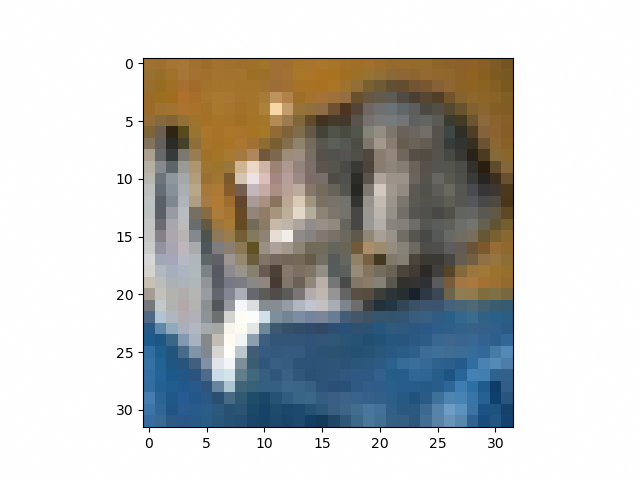

0 -- Reference: cat 	Result: dog


<IPython.core.display.Javascript object>


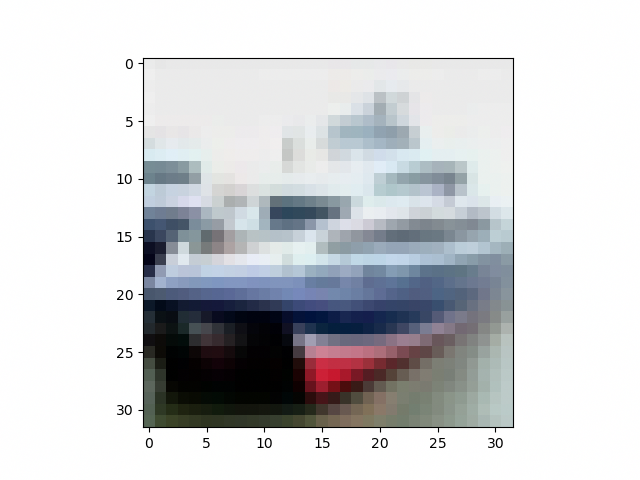

1 -- Reference: ship 	Result: ship


<IPython.core.display.Javascript object>


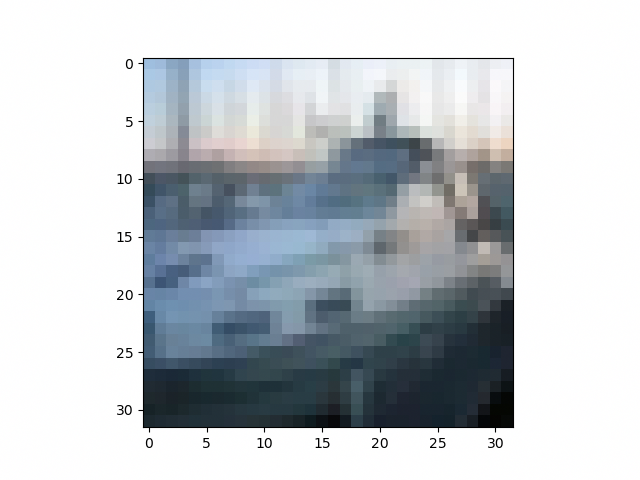

2 -- Reference: ship 	Result: ship


<IPython.core.display.Javascript object>


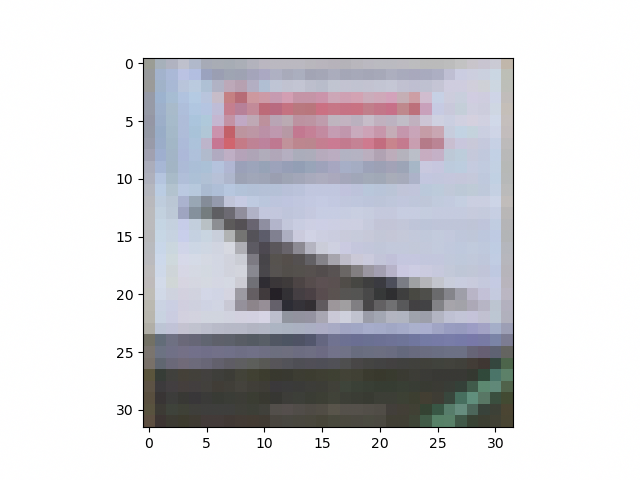

3 -- Reference: airplane 	Result: airplane


<IPython.core.display.Javascript object>


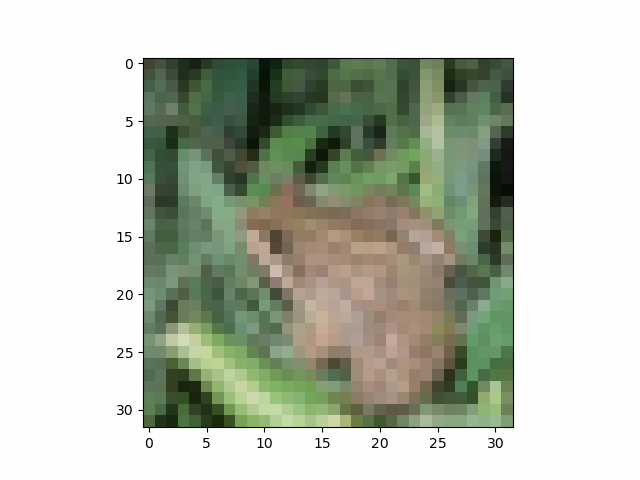

4 -- Reference: frog 	Result: frog


<IPython.core.display.Javascript object>


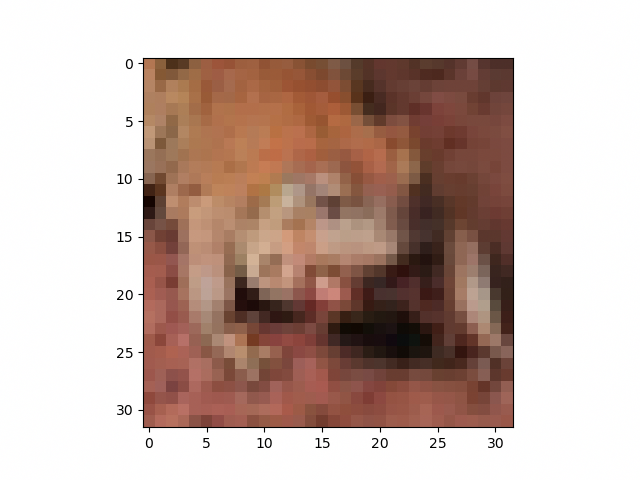

5 -- Reference: frog 	Result: frog


<IPython.core.display.Javascript object>


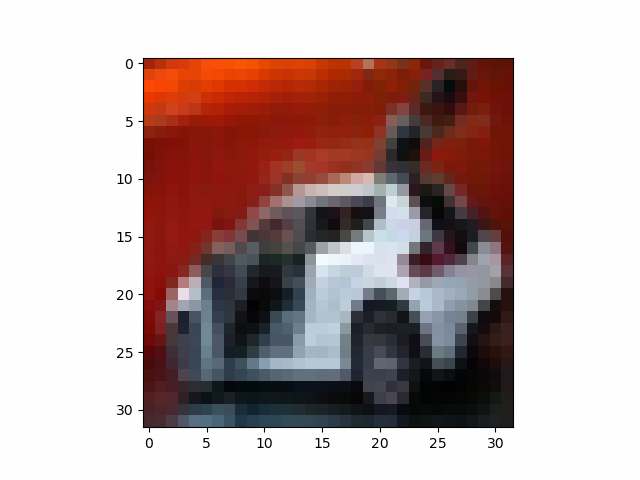

6 -- Reference: automobile 	Result: automobile


<IPython.core.display.Javascript object>


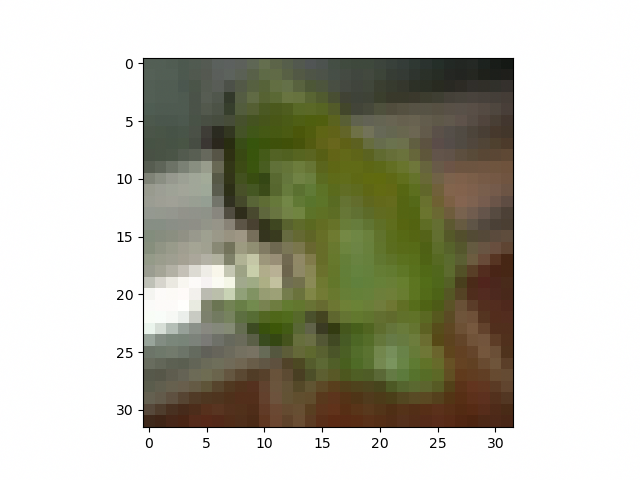

7 -- Reference: frog 	Result: frog


<IPython.core.display.Javascript object>


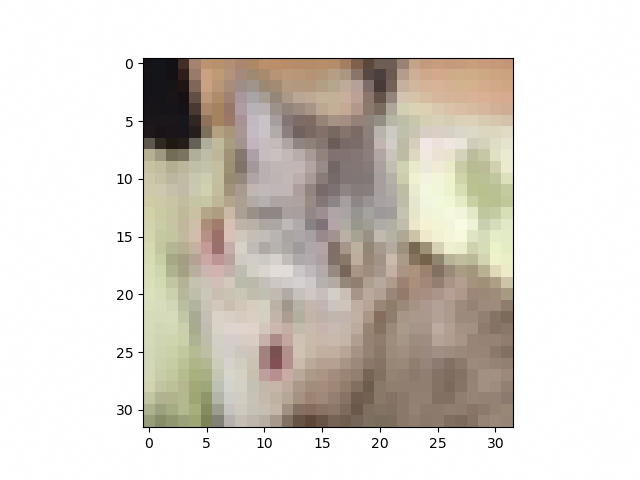

8 -- Reference: cat 	Result: cat


<IPython.core.display.Javascript object>


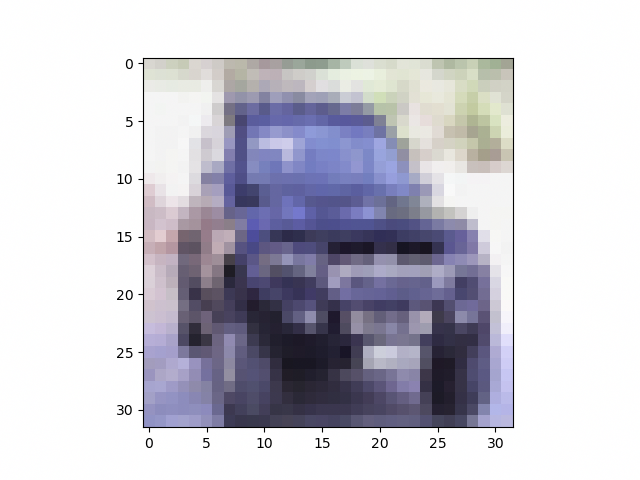

9 -- Reference: automobile 	Result: automobile


In [63]:
# test the model
classes = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

for i in range(10):
    plt.figure(i)
    plt.imshow(x_test[i])
    plt.show()
    
    res = model.predict(np.array([x_test[i]]))
    
    color = "green"
    if int(y_test[i]) != np.argmax(res):
        color = "red"
    
    print(i, "-- Reference:", classes[int(y_test[i])], colored("\tResult: " + classes[np.argmax(res)], color))